In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Reading Movies data

In [2]:
df_movies = pd.read_csv(r"C:\Users\Admin\Documents\Internship\movies.csv")

In [3]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_movies.shape

(9742, 3)

# Reading Rating data

In [5]:
df_rating = pd.read_csv(r"C:\Users\Admin\Documents\Internship\ratings.csv")

In [6]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
df_rating["userId"].unique().sum()

186355

In [8]:
df_rating["rating"] == 5.0

0         False
1         False
2         False
3          True
4          True
          ...  
100831    False
100832     True
100833     True
100834     True
100835    False
Name: rating, Length: 100836, dtype: bool

In [9]:
merge_df = pd.merge(df_movies, df_rating, on = "movieId")

In [10]:
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [11]:
rating_count = merge_df.groupby('title')['userId'].count()

In [12]:
rating_count

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: userId, Length: 9719, dtype: int64

# to check max rating

In [13]:
max_rating_count = rating_count.max()

In [20]:
max_rating_count

329

# to check movie with max rating

In [21]:
max_rating_movie = rating_count.idxmax()

In [22]:
max_rating_movie

'Forrest Gump (1994)'

# Reading tag file

In [14]:
tags = pd.read_csv("tags.csv")

In [15]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [16]:
merge = pd.merge(merge_df, tags, on = "movieId")

In [17]:
merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [18]:
sub = "Matrix"
result = merge[merge["title"].str.contains(sub)]

In [19]:
result

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
142140,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888,424,martial arts,1457842912
142141,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888,424,sci-fi,1457842899
142142,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888,474,alternate universe,1137204991
142143,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888,537,philosophy,1424141098
142144,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888,537,post apocalyptic,1424141101
...,...,...,...,...,...,...,...,...,...
143525,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,610,5.0,1479545822,424,martial arts,1457842912
143526,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,610,5.0,1479545822,424,sci-fi,1457842899
143527,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,610,5.0,1479545822,474,alternate universe,1137204991
143528,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,610,5.0,1479545822,537,philosophy,1424141098


In [21]:
sum = merge["tag"] == 'karate'

In [22]:
sum.sum()

0

# conclude that there is no karate then in the option

In [24]:
sub = "Terminator 2"
movie = merge[merge["title"].str.contains(sub)]

In [25]:
movie

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
93035,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,apocalypse,1457844854
93036,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,Arnold Schwarzenegger,1457844841
93037,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,nuclear war,1457844861
93038,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,sci-fi,1457844847
93039,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,Suspense,1457844864
...,...,...,...,...,...,...,...,...,...
94822,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,sci-fi,1457844847
94823,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,Suspense,1457844864
94824,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,time travel,1457844843
94825,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,474,robots,1137206517


In [26]:
avg_rating = movie["rating"].mean()

In [27]:
avg_rating

3.970982142857143

In [28]:
merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [29]:
sub = "Fight Club"
fight_club_rating = merge[merge["title"].str.contains(sub)]

In [30]:
fight_club_rating

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
148882,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282,424,dark comedy,1457842797
148883,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282,424,psychology,1457842802
148884,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282,424,thought-provoking,1457842786
148885,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282,424,twist ending,1457842777
148886,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282,435,dark comedy,1366676088
...,...,...,...,...,...,...,...,...,...
160649,2959,Fight Club (1999),Action|Crime|Drama|Thriller,610,5.0,1479541966,599,thought-provoking,1498456901
160650,2959,Fight Club (1999),Action|Crime|Drama|Thriller,610,5.0,1479541966,599,twist,1498456943
160651,2959,Fight Club (1999),Action|Crime|Drama|Thriller,610,5.0,1479541966,599,twist ending,1498456888
160652,2959,Fight Club (1999),Action|Crime|Drama|Thriller,610,5.0,1479541966,599,violence,1498456904


# plot

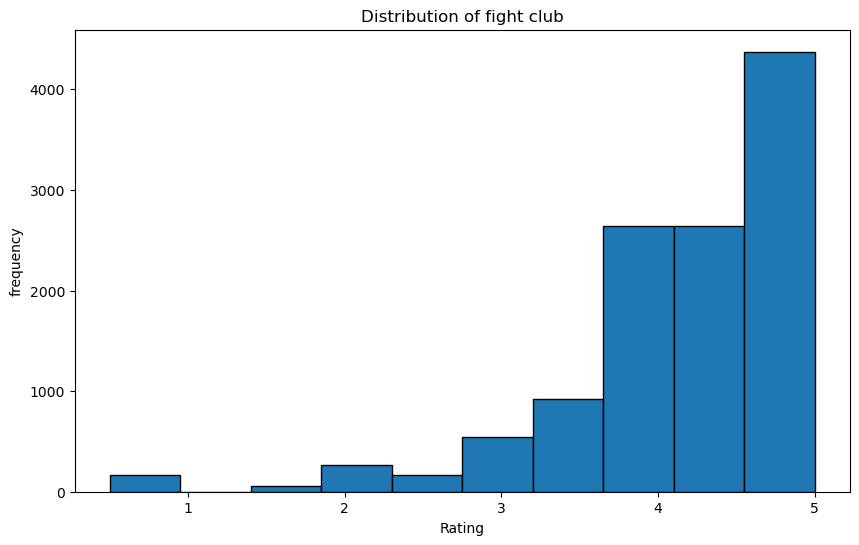

In [33]:
plt.figure(figsize = (10, 6))
plt.hist(fight_club_rating['rating'], bins =10, edgecolor = "black")
plt.title("Distribution of fight club")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.show()

In [34]:
merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [35]:
rating_count = merge.groupby("movieId")["rating"].count()

In [36]:
rating_count

movieId
1         645
2         440
3         104
5          98
7          54
         ... 
183611      3
184471     12
187593     36
187595     10
193565      4
Name: rating, Length: 1554, dtype: int64

In [37]:
rating_mean = merge.groupby("movieId")["rating"].mean()

In [38]:
rating_mean

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
7         3.185185
            ...   
183611    4.000000
184471    2.500000
187593    3.875000
187595    3.900000
193565    3.500000
Name: rating, Length: 1554, dtype: float64

In [39]:
links = pd.read_csv("links.csv")

In [40]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [44]:
grouped_ratings = merge.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# 2. Apply inner join on DataFrame created from movies.csv and the grouped DataFrame from step 1
merged_df = pd.merge(df_movies, grouped_ratings, on='movieId', how='inner')

# 3. Filter only those movies which have more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the filtered movies
print(filtered_movies)

      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           5  Father of the Bride Part II (1995)   
4           7                      Sabrina (1995)   
...       ...                                 ...   
1525   148626               Big Short, The (2015)   
1536   164179                      Arrival (2016)   
1539   168248       John Wick: Chapter Two (2017)   
1540   168252                        Logan (2017)   
1544   176371            Blade Runner 2049 (2017)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           645     3.920930  
1                      Adventure|Children|Fantasy           440     3.431818  
2                                  Comedy|Romance           104     3.259615  
3                                          Come

In [45]:
sorted_desc = filtered_movies.sort_values("rating_mean", ascending = False)

In [46]:
sorted_desc

,movieId,title,genres,rating_count,rating_mean
83,318,"Shawshank Redemption, The (1994)",Crime|Drama,1268,4.429022
204,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,81,4.333333
1428,80906,Inside Job (2010),Documentary,72,4.291667
180,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
1540,168252,Logan (2017),Action|Sci-Fi,125,4.280000
...,...,...,...,...,...
960,6157,Daredevil (2003),Action|Crime,64,2.500000
1413,69526,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,140,2.425000
1397,63992,Twilight (2008),Drama|Fantasy|Romance|Thriller,110,2.409091
1436,87430,Green Lantern (2011),Action|Adventure|Sci-Fi,90,2.350000


In [47]:
sorted_rating_desc = filtered_movies.sort_values("rating_count", ascending = False)

In [48]:
sorted_rating_desc

,movieId,title,genres,rating_count,rating_mean
77,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,55567,4.197068
637,2959,Fight Club (1999),Action|Crime|Drama|Thriller,11772,4.272936
65,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076
76,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4655,4.018797
206,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,4469,3.894495
...,...,...,...,...,...
671,3160,Magnolia (1999),Drama,52,3.711538
417,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51,3.411765
1472,106100,Dallas Buyers Club (2013),Drama,51,3.970588
501,2100,Splash (1984),Comedy|Fantasy|Romance,51,3.117647


In [49]:
# 2. Filter for Sci-Fi movies
sci_fi_movies = merge[merge['genres'].str.contains('Sci-Fi')]

# 3. Group by 'movieId' and 'title', then count the number of ratings
sci_fi_movie_ratings = sci_fi_movies.groupby(['movieId', 'title']).size().reset_index(name='rating_count')

# 4. Sort the movies by the number of ratings in descending order
sci_fi_movie_ratings = sci_fi_movie_ratings.sort_values(by='rating_count', ascending=False)

# 5. Identify the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sci_fi_movie_ratings.iloc[2]

# Display the result
print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi_movie['title']}' with {third_most_popular_sci_fi_movie['rating_count']} ratings.")

The third most popular Sci-Fi movie based on the number of user ratings is 'Eternal Sunshine of the Spotless Mind (2004)' with 4454 ratings.


In [50]:
third_most_popular_sci_fi_movie

movieId                                                 7361
title           Eternal Sunshine of the Spotless Mind (2004)
rating_count                                            4454
Name: 97, dtype: object

In [51]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1525,148626,"Big Short, The (2015)",Drama,78,3.961538
1536,164179,Arrival (2016),Sci-Fi,182,3.980769
1539,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857
1540,168252,Logan (2017),Action|Sci-Fi,125,4.280000


In [52]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [53]:
last_merge = pd.merge(filtered_movies, links, on = "movieId")

In [54]:
last_merge

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615,113228,15602.0
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429,113041,11862.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
475,148626,"Big Short, The (2015)",Drama,78,3.961538,1596363,318846.0
476,164179,Arrival (2016),Sci-Fi,182,3.980769,2543164,329865.0
477,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857,4425200,324552.0
478,168252,Logan (2017),Action|Sci-Fi,125,4.280000,3315342,263115.0


In [55]:
sorted_movie_rating = last_merge.sort_values("imdbId", ascending = False)

In [56]:
sorted_movie_rating

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
477,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857,4425200,324552.0
468,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,195,4.000000,4154756,299536.0
469,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,100,4.025000,3501632,284053.0
470,128360,The Hateful Eight (2015),Western,162,3.750000,3460252,273248.0
478,168252,Logan (2017),Action|Sci-Fi,125,4.280000,3315342,263115.0
...,...,...,...,...,...,...,...
81,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,60,3.450000,32910,10895.0
153,1282,Fantasia (1940),Animation|Children|Fantasy|Musical,53,3.783019,32455,756.0
100,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,184,3.880435,32138,630.0
79,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical,77,3.616883,29583,408.0


In [57]:
scifi = last_merge[last_merge["genres"].str.contains("Sci-Fi")]

In [58]:
scifi

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
11,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1770,3.983051,114746,63.0
26,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0
35,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076,76759,11.0
43,316,Stargate (1994),Action|Adventure|Sci-Fi,140,3.375000,111282,2164.0
46,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,108,3.393519,111280,193.0
...,...,...,...,...,...,...,...
472,135536,Suicide Squad (2016),Action|Crime|Sci-Fi,228,2.916667,1386697,297761.0
473,136864,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,144,2.343750,2975590,209112.0
476,164179,Arrival (2016),Sci-Fi,182,3.980769,2543164,329865.0
478,168252,Logan (2017),Action|Sci-Fi,125,4.280000,3315342,263115.0


In [59]:
sort_scifi_rating = scifi.sort_values("imdbId", ascending = False)

In [60]:
sort_scifi_rating

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
468,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,195,4.000000,4154756,299536.0
469,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,100,4.025000,3501632,284053.0
478,168252,Logan (2017),Action|Sci-Fi,125,4.280000,3315342,263115.0
473,136864,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,144,2.343750,2975590,209112.0
476,164179,Arrival (2016),Sci-Fi,182,3.980769,2543164,329865.0
...,...,...,...,...,...,...,...
232,2640,Superman (1978),Action|Adventure|Sci-Fi,61,3.606557,78346,1924.0
35,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076,76759,11.0
126,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,120,3.995833,66921,185.0
228,2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56,3.803571,63442,871.0
